# Predicting whether a patient is prone to get a Cardiovascular disease <br> or not?  

## 1.  Importing Libraries 

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy as sp
import seaborn as sns
sns.set(color_codes = True)
sns.set(style="darkgrid")
#sns.set_palette("deep")
#import pandas_profiling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.feature_selection import RFE,RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter('ignore')

## 2. Loading and Reading Data 

In [2]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html

     |████████████████████████████████| 993kB 2.8MB/s 


In [4]:
file_list = drive.ListFile({'q': "'18tRWHCQrQ2ZuOX_Sfg_vdq19j91YPOAT' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Capstone Project (Blackcat Data)- Cardiovascular disease - EDA.ipynb, id: 1fLVMskMc9FNlnrW4gPg1T3B6jqyxm6Bb
title: Prediction.ipynb, id: 1IS6RissG_Bs6eUcz6jCA4FPBA25rElLB
title: cardio.csv, id: 1vQeNK5FJeuKRiz4kmSLZu8zZKpA62RiY
title: Presentation - Ruchita Manuja, id: 1npRoewPwXyOFtyyPRjneI72i97iTTw2HgXKKkakGs8g
title: Cardio_cleaned.csv, id: 11gu9WaxbwcpebX81EFfDmonMlKHKzK64


In [0]:
data_downloaded = drive.CreateFile({'id': '1vQeNK5FJeuKRiz4kmSLZu8zZKpA62RiY'})
data_downloaded.GetContentFile('cardio.csv')

In [0]:
#Loading Data
data = pd.read_csv('cardio.csv',delimiter=';')

In [7]:
data.shape

(70000, 13)

In [8]:
#First 5 rows of data
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
#Last 5 rows of data
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


<b>Data contains:</b>

<ul>
    <li><b>age</b> - age in days
    <li><b>Height</b> - Height in cm
    <li><b>Weight</b> -  Weight in kg
    <li><b>Gender</b> - 1 - women , 2- men
    <li><b>ap_hi</b> - Systolic blood pressure : The top number that refers to the amount of pressure in your arteries during the contraction of your heart muscle
    <li><b>ap_lo </b> - Diastolic blood pressure : The bottom number that refers to your blood pressure when your heart muscle is between beats
    <li><b>Cholesterol</b> - 1: normal, 2: above normal, 3: well above normal 
    <li><b>Glucose</b> -     1: normal, 2: above normal, 3: well above normal  
    <li><b>Smoking</b> - (1 = yes; 0 = no) 
    <li><b>Alcohol intake</b> - (1 = yes; 0 = no)  
    <li><b>Physical activity</b> - (1 = yes; 0 = no)  
    <li><b>Presence or absence of cardiovascular disease (Target)</b> - (1 = yes; 0 = no)  
</ul>

Our id column appears to be skipping numbers let's drop this column and use the default index

In [0]:
data.drop(['id'],axis = 1,inplace = True)

In [11]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Let's convert our target variable to Category Datatype to assist with our analysis

In [0]:
for col in ['gender','cholesterol','gluc','smoke','alco','active','cardio']:
    data[col] = data[col].astype('category')

In [13]:
data.dtypes

age               int64
gender         category
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
dtype: object

In [0]:
#Converting age in years 
data['age_in_years'] = round(data['age']/365)

In [15]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


## 3. Data Exploration 

In [16]:
data.shape

(70000, 13)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
age             70000 non-null int64
gender          70000 non-null category
height          70000 non-null int64
weight          70000 non-null float64
ap_hi           70000 non-null int64
ap_lo           70000 non-null int64
cholesterol     70000 non-null category
gluc            70000 non-null category
smoke           70000 non-null category
alco            70000 non-null category
active          70000 non-null category
cardio          70000 non-null category
age_in_years    70000 non-null float64
dtypes: category(7), float64(2), int64(4)
memory usage: 3.7 MB


In [18]:
data.isnull().sum()

age             0
gender          0
height          0
weight          0
ap_hi           0
ap_lo           0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
age_in_years    0
dtype: int64

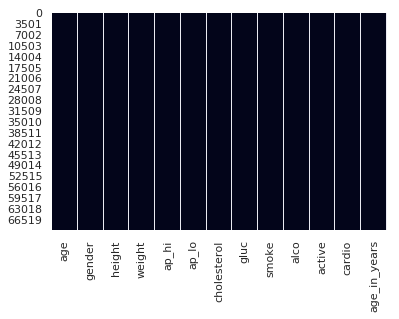

In [19]:
#Plotting Missing Values
sns.heatmap(data.isnull(),cbar=False)

In [20]:
data.describe()

,age,height,weight,ap_hi,ap_lo,age_in_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414,53.338686
std,2467.251667,8.210126,14.395757,154.011419,188.472530,6.765294
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000,30.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000,48.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000,54.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000,58.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000,65.000000


From the Summary Statistics we observe the following: 
<ul>
<li>From the height and weight columns, it can be seen that the minimum height is 55 cm and minimum weight is 10 kg. This appears to be an error, since minimum age is 10798 days/30years. Also the maximum height is 250 cm and the maximum weight is 200 kg which might be irrelevant for generilizing our data. To deal with these errors these outliers may have to be removed.</li> 
   <li> We also see that our minimum value is -150 i.e a  negative value. Negative value for Blood Pressure is also incorrect. </li> 
    <li>The maximum value for ap_hi and ap_li is also extremely large. According to http://www.bloodpressureuk.org/microsites/u40/Home/facts/Whatisnormal the Blood pressure usually ranges between 90 to 250 for the top or maximum number (systolic) and 60 to 140 for the bottom or minimum number (diastolic) </li>
    </ul> 

### 3.1. Outlier Detection

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

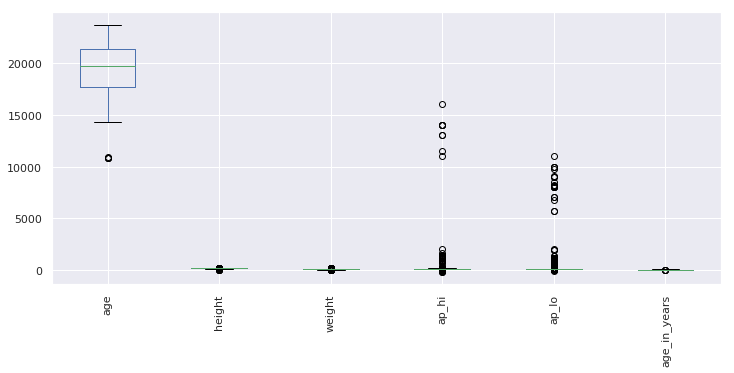

In [21]:
plt.figure(figsize=(12,5))
data[['age','height','weight','ap_hi','ap_lo','age_in_years']].boxplot()
plt.xticks(rotation = 90)

## 4.Data Cleaning

###  4. 1 Blood Pressure (ap_hi & ap_lo) 

In [22]:
# Dealing with Negative values 
negative_systolic = data[data['ap_hi'] < 0 ]
negative_diastolic = data[data['ap_lo'] < 0 ]
print('Number of values for Systolic Bloood Pressure that are below zero:' ,len(negative_systolic))
print('Number of values for Diastolic Bloood Pressure that are below zero:' ,len(negative_diastolic))

Number of values for Systolic Bloood Pressure that are below zero: 7
Number of values for Diastolic Bloood Pressure that are below zero: 1


In [23]:
negative_systolic

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
4607,15281,1,165,78.0,-100,80,2,1,0,0,1,0,42.0
16021,22108,2,161,90.0,-115,70,1,1,0,0,1,0,61.0
20536,15581,1,153,54.0,-100,70,1,1,0,0,1,0,43.0
23988,18301,1,162,74.0,-140,90,1,1,0,0,1,1,50.0
25240,14711,2,168,50.0,-120,80,2,1,0,0,0,1,40.0
35040,23325,2,168,59.0,-150,80,1,1,0,0,1,1,64.0
46627,23646,2,160,59.0,-120,80,1,1,0,0,0,0,65.0


Let's convert these negative systolic blood pressure values to positive value assuming that they have been incorrectly entered with negative symbol. 

In [24]:
data['ap_hi'] = data['ap_hi'].abs()
abs_negative_systolic = data[data['ap_hi'] < 0 ]
print('Number of values for Systolic Blood Pressure that are below zero after conversion:' ,len(abs_negative_systolic))

Number of values for Systolic Blood Pressure that are below zero after conversion: 0


In [25]:
negative_diastolic 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
60106,22571,1,167,74.0,15,-70,1,1,0,0,1,1,62.0


In [26]:
data['ap_lo'] = data['ap_lo'].abs()
abs_negative_diastolic = data[data['ap_hi'] < 0 ]
print('Number of values for Disatolic Blood Pressure that are below zero after conversion:' ,len(abs_negative_diastolic))

Number of values for Disatolic Blood Pressure that are below zero after conversion: 0


In [27]:
data.shape

(70000, 13)

Let's now drop any values that do not fall within the Blood Pressure range of between 90 to 250 for the top or maximum number (systolic) and 60 to 140 for the bottom or minimum number (diastolic)

In [0]:
cleaned_systolic = data.drop(data[(data.ap_hi < 90) | (data.ap_hi > 250)].index)

In [29]:
cleaned_systolic.shape

(69646, 13)

In [0]:
cleaned_diastolic = cleaned_systolic.drop(cleaned_systolic[(cleaned_systolic['ap_lo'] < 60) | (cleaned_systolic['ap_lo'] > 140)].index)

In [31]:
cleaned_diastolic.shape

(68523, 13)

While looking at the Diastolic negative value we noticed that the absolute value of Disatolic is higher than Systolic which is not correct as Diastolic blood pressure is always lower than systolic. Let's check if there are any more of such discrepancies. 

In [32]:
print("Diastolic Blood pressure is higher than systolic in {0} cases".format(cleaned_diastolic[cleaned_diastolic['ap_lo']> 
                                                                                    cleaned_diastolic['ap_hi']].shape[0]))

Diastolic Blood pressure is higher than systolic in 24 cases


Let's drop these values as Diastolic Blood pressure cannot be higher than systolic blood pressure.

In [0]:
bpclean_df = cleaned_diastolic.drop(cleaned_diastolic[cleaned_diastolic['ap_lo'] > cleaned_diastolic['ap_hi']].index)

In [34]:
bpclean_df.shape

(68499, 13)

In [35]:
bpclean_df.describe()

,age,height,weight,ap_hi,ap_lo,age_in_years
count,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000
mean,19466.138192,164.369129,74.142538,126.734989,81.367786,53.331406
std,2467.585989,8.182074,14.325127,16.596144,9.324140,6.766199
min,10798.000000,55.000000,11.000000,90.000000,60.000000,30.000000
25%,17660.500000,159.000000,65.000000,120.000000,80.000000,48.000000
50%,19702.000000,165.000000,72.000000,120.000000,80.000000,54.000000
75%,21326.000000,170.000000,82.000000,140.000000,90.000000,58.000000
max,23713.000000,250.000000,200.000000,240.000000,140.000000,65.000000


We have now cleaned our data for the Blood Pressure values. However, we still need to cater for the Height & Weight. Lets now look at these.

###  4.2 Height & Weight  

#### Let's calculate the BMI based on the height and weight values to assist our analysis

In [0]:
bpclean_df['BMI'] = bpclean_df['weight'] / ((bpclean_df['height']/100)**2)

In [37]:
bpclean_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


In [38]:
bpclean_df.describe()

,age,height,weight,ap_hi,ap_lo,age_in_years,BMI
count,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000
mean,19466.138192,164.369129,74.142538,126.734989,81.367786,53.331406,27.528418
std,2467.585989,8.182074,14.325127,16.596144,9.324140,6.766199,6.052898
min,10798.000000,55.000000,11.000000,90.000000,60.000000,30.000000,3.471784
25%,17660.500000,159.000000,65.000000,120.000000,80.000000,48.000000,23.875115
50%,19702.000000,165.000000,72.000000,120.000000,80.000000,54.000000,26.346494
75%,21326.000000,170.000000,82.000000,140.000000,90.000000,58.000000,30.119376
max,23713.000000,250.000000,200.000000,240.000000,140.000000,65.000000,298.666667


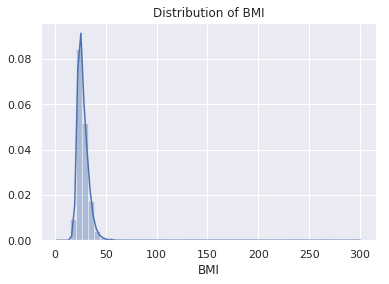

In [39]:
#BMI Distribution 
plt.title('Distribution of BMI')
sns.distplot(bpclean_df['BMI'])

The BMI range starts at a very low value of 3.47 and maximum is 298. These values are way to low or high for a BMI, because of the very low or very high weight and height values in our dataset. Let's remove the first and last quartile data. 

####  Removing the first and last quartile data

In [0]:
BMIclean_df = bpclean_df.drop(bpclean_df[(bpclean_df['BMI'] > bpclean_df['BMI'].quantile(0.975)) | 
                                      (bpclean_df['BMI'] < bpclean_df['BMI'].quantile(0.025))].index)


In [41]:
BMIclean_df.shape

(65081, 14)

In [42]:
BMIclean_df.describe()

,age,height,weight,ap_hi,ap_lo,age_in_years,BMI
count,65081.000000,65081.000000,65081.000000,65081.000000,65081.000000,65081.000000,65081.000000
mean,19477.392204,164.542539,73.762451,126.703170,81.368848,53.362395,27.256107
std,2462.441085,7.763317,12.450953,16.361646,9.199171,6.752003,4.323425
min,10798.000000,120.000000,30.000000,90.000000,60.000000,30.000000,19.879103
25%,17686.000000,159.000000,65.000000,120.000000,80.000000,48.000000,23.875433
50%,19707.000000,165.000000,72.000000,120.000000,80.000000,54.000000,26.346494
75%,21330.000000,170.000000,81.000000,140.000000,90.000000,58.000000,29.996713
max,23713.000000,198.000000,135.000000,240.000000,140.000000,65.000000,40.159203


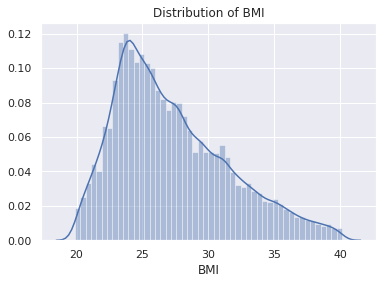

In [43]:
#BMI Distribution 
plt.title('Distribution of BMI')
sns.distplot(BMIclean_df['BMI'])

In [44]:
#Dropping the age in days column 
BMIclean_df.drop(['age'],axis = 1,inplace = True)
BMIclean_df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


In [0]:
BMIclean_df.tail()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
69994,1,165,80.0,150,80,1,1,0,0,1,1,58.0,29.384757
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0,26.927438
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.0,31.353579
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0,27.099251
69999,1,170,72.0,120,80,2,1,0,0,1,0,56.0,24.913495


Our dataset looks is all cleaned now. Lets now start with our analysis

In [0]:
#Copying our cleaned data to a new dataframe df and resetting the index 
df = BMIclean_df.copy()

In [46]:
df.shape

(65081, 13)

In [47]:
df.isnull().sum()

gender          0
height          0
weight          0
ap_hi           0
ap_lo           0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
age_in_years    0
BMI             0
dtype: int64

In [48]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


In [49]:
df.tail()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
69994,1,165,80.0,150,80,1,1,0,0,1,1,58.0,29.384757
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0,26.927438
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.0,31.353579
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0,27.099251
69999,1,170,72.0,120,80,2,1,0,0,1,0,56.0,24.913495


### 4.3 Outliers after cleaning

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

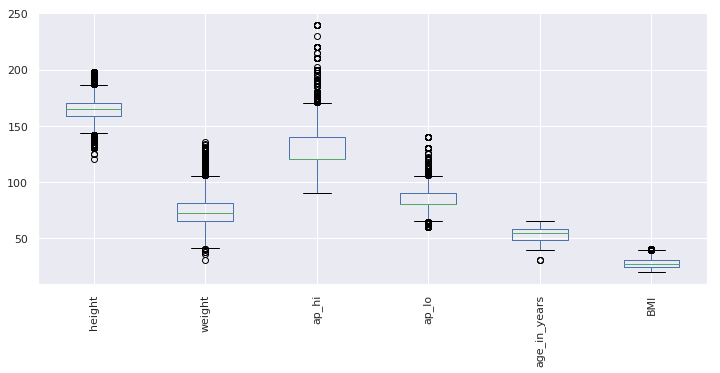

In [50]:
#Outlier Detection after cleaning
plt.figure(figsize=(12,5))
df[['height','weight','ap_hi','ap_lo','age_in_years','BMI']].boxplot()
plt.xticks(rotation = 90)

In [0]:
#df.to_csv('Cardio_cleaned.csv')

## 5.Data Analysis

In [0]:
categorical_data = df[['gender','cholesterol','gluc','smoke','alco','active','cardio']] 
continuous_data = df[['height','weight','ap_hi','ap_lo','age_in_years','BMI']]

### 5.1 Class/Target Variable Distribution

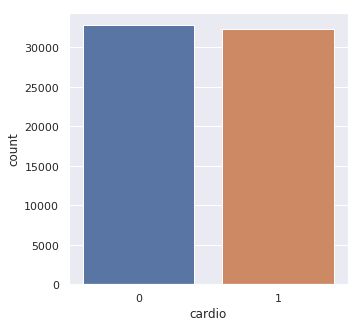

In [53]:
#Class Distribution
plt.figure(figsize=(5,5))
sns.countplot(x="cardio", data=df)
plt.show()

In [54]:
NoDiseaseCount = len(df[df.cardio == 0])
HaveDiseaseCount = len(df[df.cardio == 1])
print("Percentage of Patients that have do not have a cardiovascular Disease: {:.2f}%".format((NoDiseaseCount / (len(df.cardio))*100)))
print("Percentage of Patients that have a cardiovascular Disease: {:.2f}%".format((HaveDiseaseCount / (len(df.cardio))*100)))

Percentage of Patients that have do not have a cardiovascular Disease: 50.39%
Percentage of Patients that have a cardiovascular Disease: 49.61%


<h5> We can see that our classes are well balanced, and therefore we will not have to deal with a class imbalance issue </h5>

### 5.2  Distribution of Continous Features 

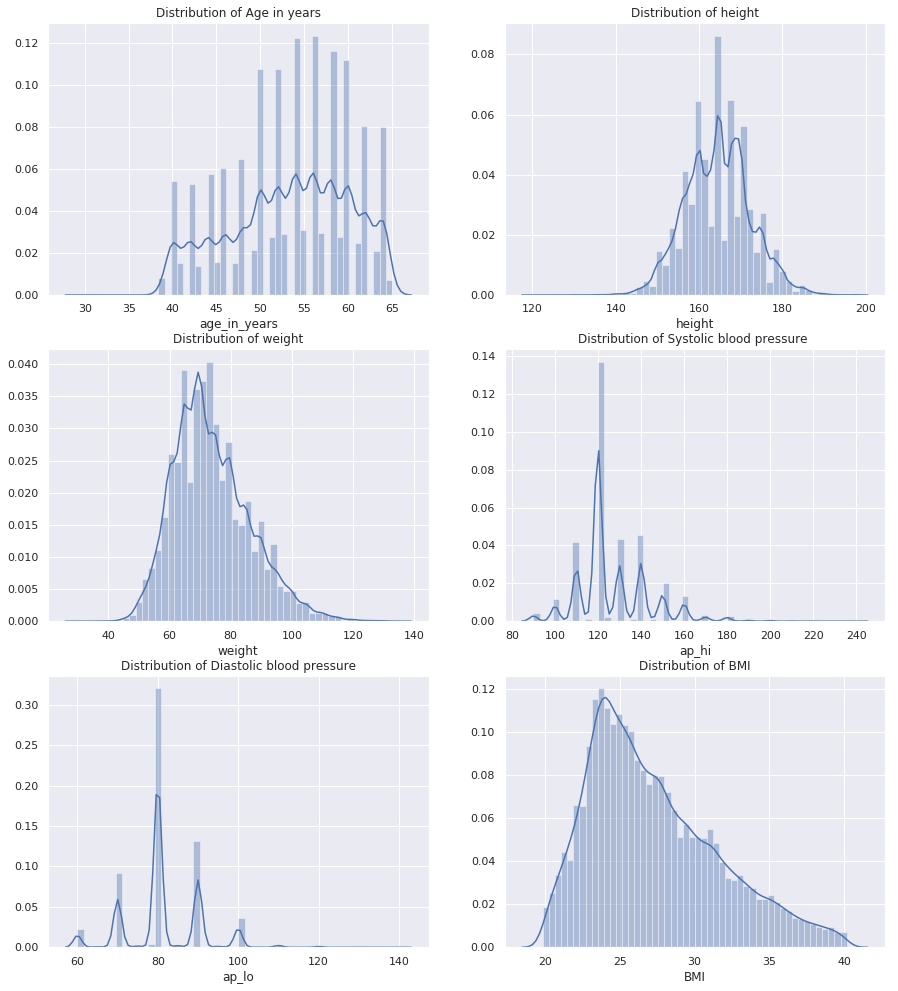

In [55]:
plt.figure(figsize=(15, 17))

#Age Distribution
plt.subplot(3,2,1)
plt.title('Distribution of Age in years')
sns.distplot(df['age_in_years'])


#Height distribution
plt.subplot(3,2,2)
plt.title('Distribution of height')
sns.distplot(df['height'])


#Weight distribution
plt.subplot(3,2,3)
plt.title('Distribution of weight')
sns.distplot(df['weight'])


#Systolic blood pressure distribution
plt.subplot(3,2,4)
plt.title('Distribution of Systolic blood pressure ')
sns.distplot(df['ap_hi'])

#Diastolic blood pressure                  
plt.subplot(3,2,5)
plt.title('Distribution of Diastolic blood pressure')
sns.distplot(df['ap_lo'])

#BMI                  
plt.subplot(3,2,6)
plt.title('Distribution of BMI')
sns.distplot(df['BMI'])

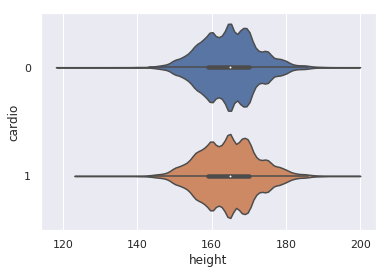

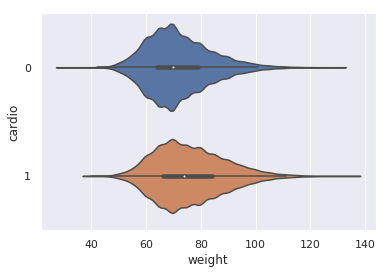

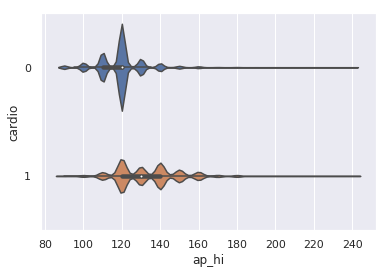

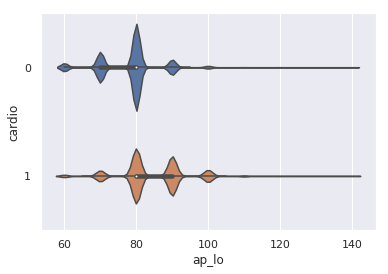

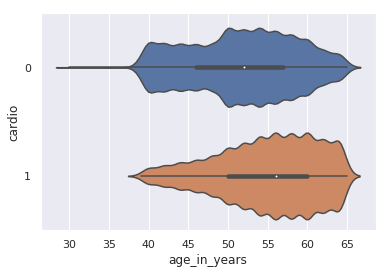

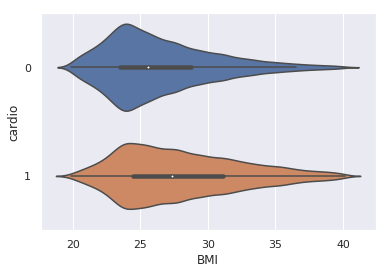

In [56]:
#Distribution using Violin Plot
numerical_data = df[['height','weight','ap_hi','ap_lo','age_in_years','BMI','cardio']]
for col in numerical_data.columns:
    if col not in ['cardio']:
        sns.violinplot(y="cardio", x=col,data=numerical_data)
        plt.show()

### 5.3 Distribution of Categorical Features 

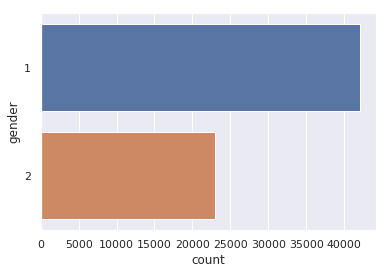

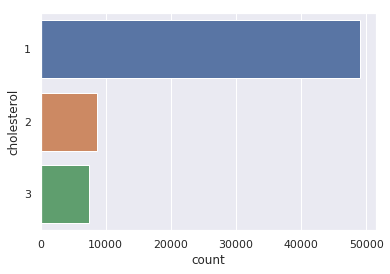

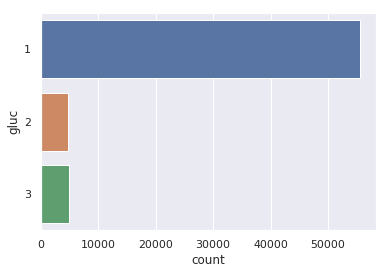

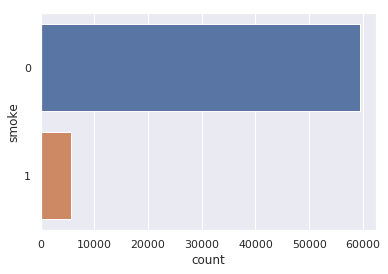

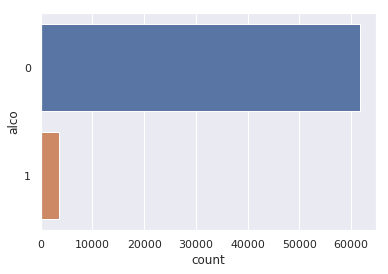

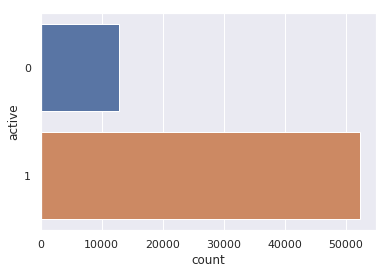

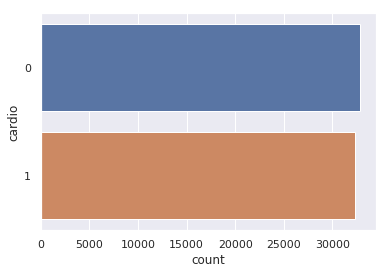

In [57]:
for col in categorical_data:
    sns.countplot(y = categorical_data[col])
    plt.show()

### 5.4 Segmentation - BMI vs Blood Pressure 

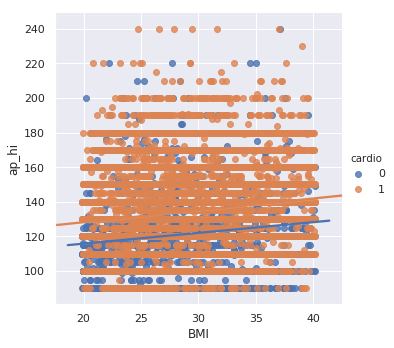

In [58]:
sns.lmplot(x='BMI', y='ap_hi', hue='cardio', data=df, fit_reg=True)

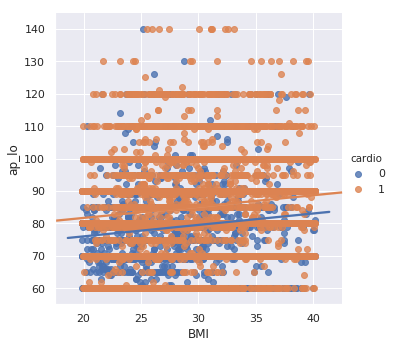

In [59]:
sns.lmplot(x='BMI', y='ap_lo', hue='cardio', data=df, fit_reg=True)

We dont see much correlation between BMI and Blood Pressure as we thought it maybe. Let's now check the Correlation Plot 

### 5.5 Correlation 

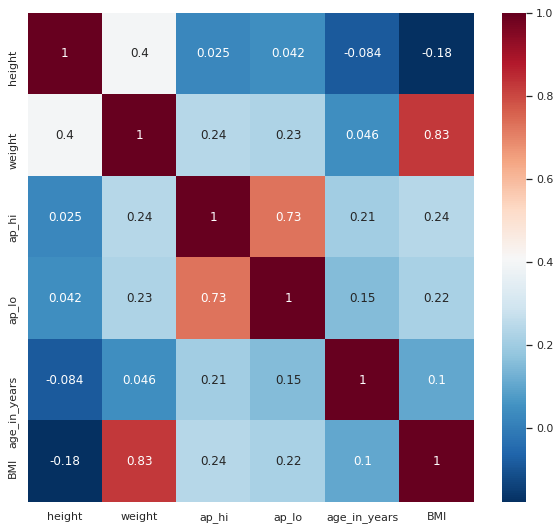

In [63]:
corr = df.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot = True,cmap="RdBu_r")

From the correlation plot we observe the following: 
<ul> 
    <li>There is a strong positive correlation between </li>
        <ul>
            <li>BMI and weight - 0.83</li>
            <li> Systolic and Diastolic Blood Pressure - 0.73</li>
        </ul>
 </ul>

Let's plot the lmplot for weight vs BMI

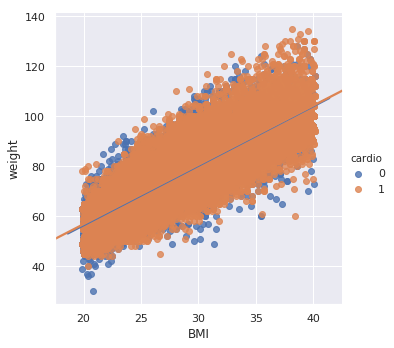

In [64]:
sns.lmplot(x='BMI', y='weight', hue='cardio', data=df, fit_reg=True)

As expected the BMI increases with increase in weight, however we dont see any diference whether a person is prone to get a CVD or not as that appears to equally distributed

### 5.6 Gender Analysis 

Text(0.5, 1.0, 'Number of patients as per their Sex')

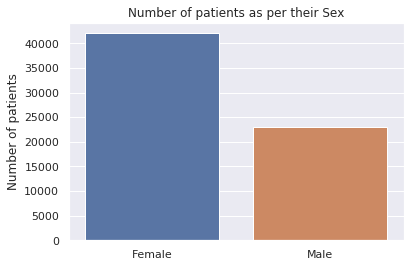

In [65]:
#(Gender - 1 - women , 2- men)
g = sns.countplot(df['gender'])
g.set(xticklabels=['Female','Male'])
plt.xlabel('')
plt.ylabel('Number of patients')
plt.title('Number of patients as per their Sex')

In [66]:
total_genders_count=len(df['gender'])
female_count=len(df[df['gender']==1])
male_count=len(df[df['gender']==2])
print('Male Count    :',male_count)
print('Female Count  :',female_count)
#Percentage ratios
print("Male Percentage: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female Percentage: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male Count    : 23044
Female Count  : 42037
Male Percentage: 35.41%
Female Percentage: 64.59%


The dataset contains more records for female over males

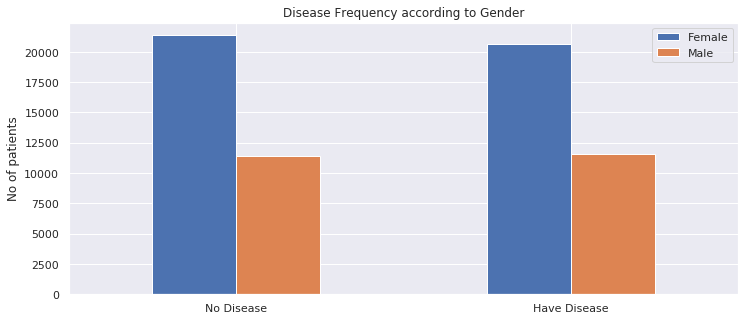

In [67]:
fig1 = df.groupby(['cardio','gender'])['gender'].count().unstack().plot(kind='bar', figsize = (12,5))
plt.ylabel('No of patients')
plt.xlabel('')
fig1.set(xticklabels=['No Disease','Have Disease'])
for tick in fig1.get_xticklabels():
    tick.set_rotation(360)
legend = ['Female','Male']
plt.legend(legend)
plt.title('Disease Frequency according to Gender')
plt.show()

In [68]:
male_nodisease = len(df[(df.gender == 2) & (df.cardio == 0)])
female_nodisease = len(df[(df.gender == 1) & (df.cardio == 0)])
male_withdisease = len(df[(df.gender == 2) & (df.cardio == 1)])
female_withdisease = len(df[(df.gender == 1) & (df.cardio == 1)])
print("Male with no disease Percentage: {:.2f}%".format((male_nodisease / (male_count)*100)))
print("Female with no disease Percentage: {:.2f}%".format((female_nodisease  / (female_count )*100)))
print("Male with disease Percentage: {:.2f}%".format((male_withdisease  / (male_count)*100)))
print("Female with disease Percentage: {:.2f}%".format((female_withdisease / (female_count )*100)))

Male with no disease Percentage: 49.65%
Female with no disease Percentage: 50.79%
Male with disease Percentage: 50.35%
Female with disease Percentage: 49.21%


It appears that Males have a sligthly higher risk of getting a CVD disease than Females. But this is again very low i.e 1%

### 5.7 Age Analysis 

In [69]:
min_age = df['age_in_years'].min()
max_age = df['age_in_years'].max()
mean_age = df['age_in_years'].mean()
median_age = df['age_in_years'].median()
print("Minimum Age:", min_age,"years")
print("Maximum Age:", max_age,"years")
print("Average Age: {:.0f}".format(mean_age),"years")
print("Median Age: {:.0f}".format(median_age),"years")

Minimum Age: 30.0 years
Maximum Age: 65.0 years
Average Age: 53 years
Median Age: 54 years


Let's create a function to calculate the age bracket to find out which age group suffer from a heart disease the most

In [0]:
def age_group(age):
    
    if age in range(30,40):
        bucket = '30-39'
    
    if age in range(40, 50):
        bucket = '40-49'
        
    if age in range(50, 60):
        bucket = '50-59'
        
    if age in range(60, 70):
        bucket = '60-69'

    return bucket 

In [0]:
#Applying the age_group function to our data 
df['age_group'] = df['age_in_years'].apply(age_group)

In [72]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI,age_group
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120,50-59
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679,50-59
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805,50-59
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479,40-49
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177,40-49


In [73]:
df.tail()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI,age_group
69994,1,165,80.0,150,80,1,1,0,0,1,1,58.0,29.384757,50-59
69995,2,168,76.0,120,80,1,1,1,0,1,0,53.0,26.927438,50-59
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.0,31.353579,50-59
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.0,27.099251,60-69
69999,1,170,72.0,120,80,2,1,0,0,1,0,56.0,24.913495,50-59


In [74]:
df.dtypes

gender          category
height             int64
weight           float64
ap_hi              int64
ap_lo              int64
cholesterol     category
gluc            category
smoke           category
alco            category
active          category
cardio          category
age_in_years     float64
BMI              float64
age_group         object
dtype: object

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

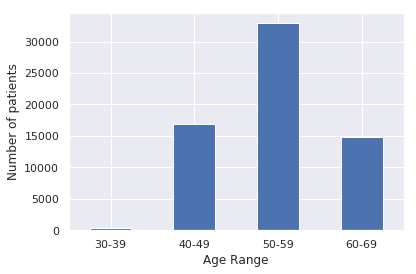

In [75]:
df['age_group'].value_counts().reindex(["30-39", "40-49", "50-59","60-69"]).plot(kind="bar")
plt.xlabel('Age Range')
plt.ylabel('Number of patients') 
plt.xticks(rotation='horizontal')

Our dataset contains more patients in the range of 50-59

Text(0.5, 1.0, 'Disease frequency as per Age Group')

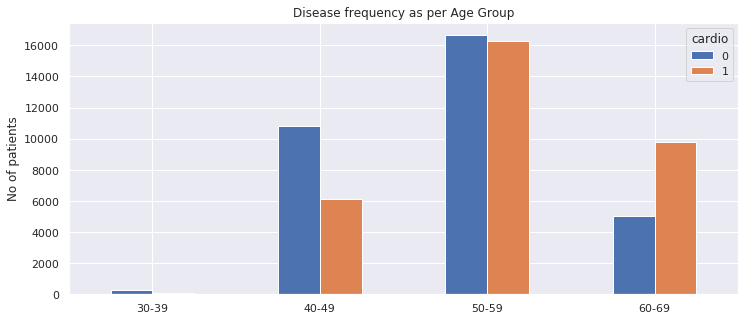

In [76]:
fig2 = df.groupby(['age_group','cardio'])['cardio'].count().unstack().plot(kind='bar', figsize = (12,5))
plt.ylabel('No of patients')
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.title('Disease frequency as per Age Group')

Older people are at a higher risk of getting a cardiovascular disease compared to younger people

### 5.8 Categorical Variables Comparision  

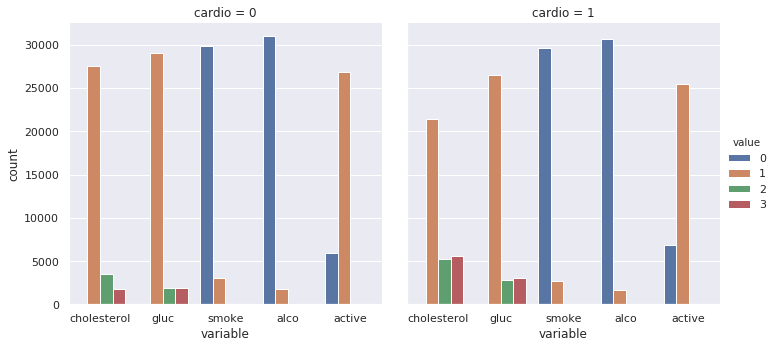

In [77]:
#Cholesterol - 1: normal, 2: above normal, 3: well above normal
#glucose - 1: normal, 2: above normal, 3: well above normal
#Smoking - (1 = yes; 0 = no)
#Alcohol intake - (1 = yes; 0 = no)
#Physical activity - (1 = yes; 0 = no)
col=['cholesterol','gluc', 'smoke', 'alco', 'active']
df2=pd.melt(df,id_vars="cardio",value_vars=df[col])
sns.catplot(x="variable",hue="value",col="cardio",data=df2,kind="count")

It can be clearly seen that patients with Cardiovascular disease have higher cholesterol & blood glucose level. They are also less active compared to patients who do nothave a cardiovascular disease. While Smoking and Alchohol dont seem to contribute much to whether a patient has a disease or not.

# 6.  Data Preprocessing & Modelling - Please refer to the Prediction notebook